# Gender Voice Classification

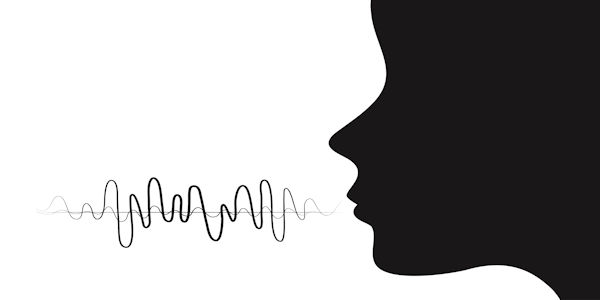

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

dataset avaliable in https://www.kaggle.com/primaryobjects/voicegender/data

In [2]:
#importing data with pandas
dataset = pd.read_csv("Data/voice.csv")

In [3]:
dataset.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
dataset.shape

(3168, 21)

In [5]:
dataset.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [6]:
dataset.isnull().values.any()

False

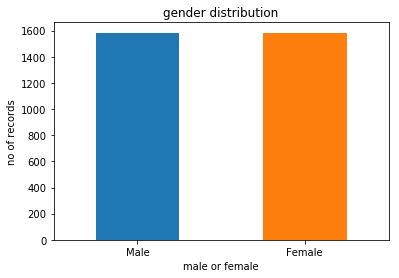

In [7]:
LABELS = ["Male", "Female"]
count_classes = pd.value_counts(dataset['label'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("gender distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("male or female")
plt.ylabel("no of records")

In [8]:
male = dataset[dataset.label == 'male']
female = dataset[dataset.label == 'female']

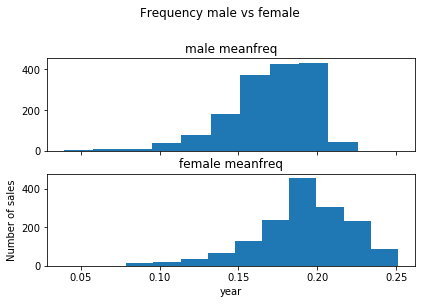

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Frequency male vs female')

bins = 10

ax1.hist(male.meanfreq, bins = bins)

ax1.set_title('male meanfreq')

ax2.hist(female.meanfreq, bins = bins)

ax2.set_title('female meanfreq')



plt.xlabel('year')
plt.ylabel('Number of sales')
plt.subplots_adjust(top=0.80, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show();


In [10]:
male.shape

(1584, 21)

In [11]:
female.shape

(1584, 21)

In [12]:
x=dataset.iloc[:,:-1].values

In [13]:
print(x[0])

[  5.97809850e-02   6.42412677e-02   3.20269134e-02   1.50714886e-02
   9.01934399e-02   7.51219512e-02   1.28634618e+01   2.74402906e+02
   8.93369417e-01   4.91917766e-01   0.00000000e+00   5.97809850e-02
   8.42791064e-02   1.57016683e-02   2.75862069e-01   7.81250000e-03
   7.81250000e-03   7.81250000e-03   0.00000000e+00   0.00000000e+00]


In [14]:
x.shape

(3168, 20)

In [15]:
y=dataset.iloc[:,-1].values

In [16]:
print(y)

['male' 'male' 'male' ..., 'female' 'female' 'female']


In [17]:
y.shape

(3168,)

In [18]:
#encoding lable [male,female] as [1,0]
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [19]:
print(y)

[1 1 1 ..., 0 0 0]


In [20]:
#scaling data for performance 
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x= sc_x.fit_transform(x)
sc_y = StandardScaler()
y= sc_y.fit_transform(y)

/home/vijay/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/vijay/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/vijay/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [21]:
print(x[0])

[-4.04924806  0.4273553  -4.22490077 -2.57610164 -5.69360723 -0.21477826
  2.29330585  1.76294635 -0.03908279  0.4715753  -2.14121031 -4.04924806
 -1.81203825 -1.0979981   0.56595854 -1.5642046  -0.70840431 -1.43142165
 -1.41913712 -1.45477229]


In [22]:
#spliting data for validation
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

/home/vijay/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
from sklearn.linear_model import LogisticRegression
classify=LogisticRegression()
classify.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
y_pred=classify.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [26]:
accuracy=((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))*100
print("Accuracy :"+str(accuracy))

Accuracy :97.9495268139


In [27]:
from sklearn.svm import SVC
classifier_linear = SVC(kernel = 'linear', random_state = 0)
classifier_linear.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
y_pred=classifier_linear.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [30]:
accuracy=((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))*100
print("Accuracy :"+str(accuracy))

Accuracy :98.2649842271


In [31]:
from sklearn.svm import SVC
classifier_rbf = SVC(kernel = 'rbf', random_state = 0)
classifier_rbf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
y_pred=classifier_rbf.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [34]:
accuracy=((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))*100
print("Accuracy :"+str(accuracy))

Accuracy :98.8958990536


In [35]:
from sklearn.metrics import confusion_matrix
from sklearn import ensemble
params = {'n_estimators': 5000, 'max_depth': 10, 'min_samples_split': 5,
          'learning_rate': 0.001, 'loss': 'exponential'}
clf = ensemble.GradientBoostingClassifier(**params)

clf.fit(x_train, y_train)

cm = confusion_matrix(y_test, clf.predict(x_test))
accuracy=((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))*100
print("Accuracy :"+str(accuracy))

Accuracy :96.6876971609


In [36]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = x_train, y = y_train, cv = 10)
print('accuracy_mean {0} accuracy_std {1}'.format(accuracies.mean(),accuracies.std()))

accuracy_mean 0.9648873189270313 accuracy_std 0.008508337955977281
